In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
names = ['Age', 'Gender', 'Job', 'Market']

dataset = pd.read_csv('data/WKW_marketingcampaign_event1.csv', names=names)

In [25]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])


# Data

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [28]:
X

array([[1.0, 0.0, 0.0, 24, 0],
       [1.0, 0.0, 0.0, 24, 0],
       [1.0, 0.0, 0.0, 22, 1],
       [1.0, 0.0, 0.0, 22, 1],
       [1.0, 0.0, 0.0, 22, 0],
       [1.0, 0.0, 0.0, 25, 1],
       [1.0, 0.0, 0.0, 23, 1],
       [1.0, 0.0, 0.0, 27, 1],
       [1.0, 0.0, 0.0, 19, 1],
       [1.0, 0.0, 0.0, 33, 0],
       [0.0, 1.0, 0.0, 22, 0],
       [0.0, 1.0, 0.0, 22, 1],
       [0.0, 1.0, 0.0, 22, 0],
       [0.0, 1.0, 0.0, 23, 0],
       [0.0, 1.0, 0.0, 26, 1],
       [0.0, 1.0, 0.0, 23, 0],
       [0.0, 0.0, 1.0, 21, 0],
       [0.0, 0.0, 1.0, 22, 0],
       [0.0, 0.0, 1.0, 23, 1],
       [0.0, 0.0, 1.0, 20, 1],
       [0.0, 0.0, 1.0, 22, 0],
       [0.0, 0.0, 1.0, 22, 0],
       [0.0, 0.0, 1.0, 21, 1],
       [0.0, 0.0, 1.0, 21, 1],
       [0.0, 0.0, 1.0, 19, 0],
       [0.0, 0.0, 1.0, 21, 1],
       [0.0, 0.0, 1.0, 20, 1],
       [0.0, 0.0, 1.0, 22, 1],
       [0.0, 0.0, 1.0, 20, 1],
       [0.0, 0.0, 1.0, 20, 0],
       [0.0, 0.0, 1.0, 20, 0],
       [0.0, 0.0, 1.0, 19, 0],
       [

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TRAINING

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

TESTING

In [32]:
y_pred = classifier.predict(X_test)

# EVALUATING

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 1 0 3]
 [0 0 0 0]
 [0 0 0 2]
 [1 0 0 3]]
                   precision    recall  f1-score   support

Community Partner       0.67      0.33      0.44         6
 INVITED DELEGATE       0.00      0.00      0.00         0
       Influencer       0.00      0.00      0.00         2
 Social Media Ads       0.38      0.75      0.50         4

         accuracy                           0.42        12
        macro avg       0.26      0.27      0.24        12
     weighted avg       0.46      0.42      0.39        12



C:\Users\ihuda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ihuda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ihuda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

# Error Rate

Text(0, 0.5, 'Error rata-rata')

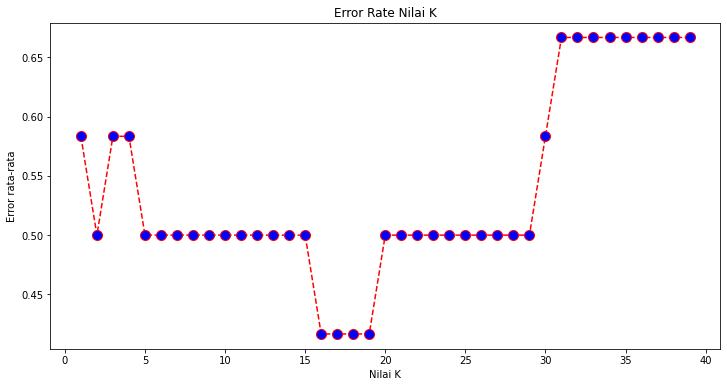

In [34]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')

# PREDICT

In [35]:
"""
predict(Employee,Freelance,Student,Age,Gender)
Employee 0/1
Freelance 0/1
Student 0/1
Age int
Gender 0 = Female / 1 = Male
"""
input = [[1,0,0,19,1]]
input = scaler.transform(input)

In [36]:
result = classifier.predict(input)
print("Market : " + result)

['Market : PP']
